In [1]:
import gzip, pickle
from torch_geometric.data import DataLoader
from gnn_model import GNN
import config
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import torch
import gnn_utils
import matplotlib.pyplot as plt

In [2]:
# load data
with gzip.open(config.gnn_data_dir+"train.pkl.gz", "rb") as f:
    train_X = pickle.load(f)
with gzip.open(config.gnn_data_dir+"val.pkl.gz", "rb") as f:
    val_X = pickle.load(f)
with gzip.open(config.gnn_data_dir+"test.pkl.gz", "rb") as f:
    test_X = pickle.load(f)
bs = config.bs
train_loader_no_shuffle = DataLoader(train_X, batch_size = bs, shuffle=False, drop_last=False)
val_loader_no_shuffle = DataLoader(val_X, batch_size = bs, shuffle=False, drop_last=False)
test_loader = DataLoader(test_X, batch_size=bs, shuffle=False, drop_last=False)

/Users/anna/anaconda3/envs/tf_env/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [3]:
# load the best model    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNN(n_features = config.n_features).to(device)
model.load_state_dict(torch.load( config.best_model ))

<All keys matched successfully>

train results


r2: 0.7786
rmse: 1.0443
sp: 0.8907
mae: 0.7303


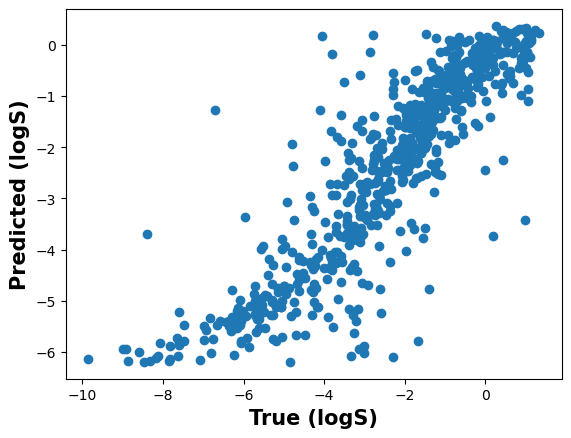

valid results
r2: 0.7014
rmse: 1.3413
sp: 0.8623
mae: 0.8280


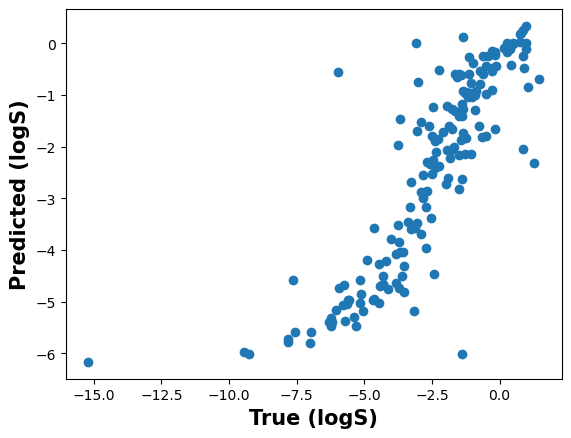

test results


r2: 0.7075
rmse: 1.3117
sp: 0.9123
mae: 0.7486


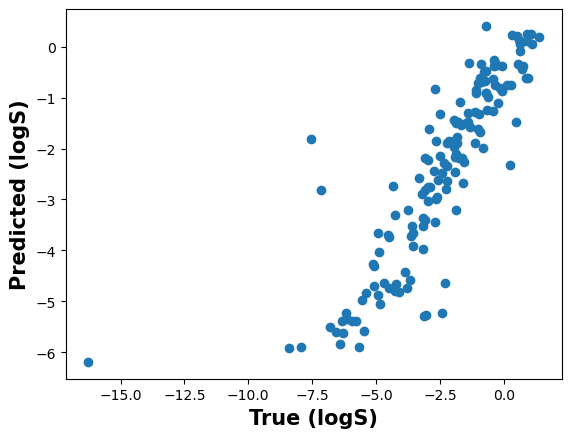

In [4]:
# make predictions
gnn_utils.get_results('train', train_loader_no_shuffle, model, device)
gnn_utils.get_results('valid', val_loader_no_shuffle, model, device)
gnn_utils.get_results('test', test_loader, model, device)